In [1]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz  # ①
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr  # ②
!make  # ③
!make install  # ④
!pip install Ta-Lib

--2022-05-12 19:26:23--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-12 19:26:23--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-05-12 19:26:24--  http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge.n

In [ ]:
!uname -a

Linux 5fabceb9798c 5.4.188+ #1 SMP Sun Apr 24 10:03:06 PDT 2022 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [3]:
!pip install mplfinance

     |████████████████████████████████| 70 kB 3.8 MB/s 


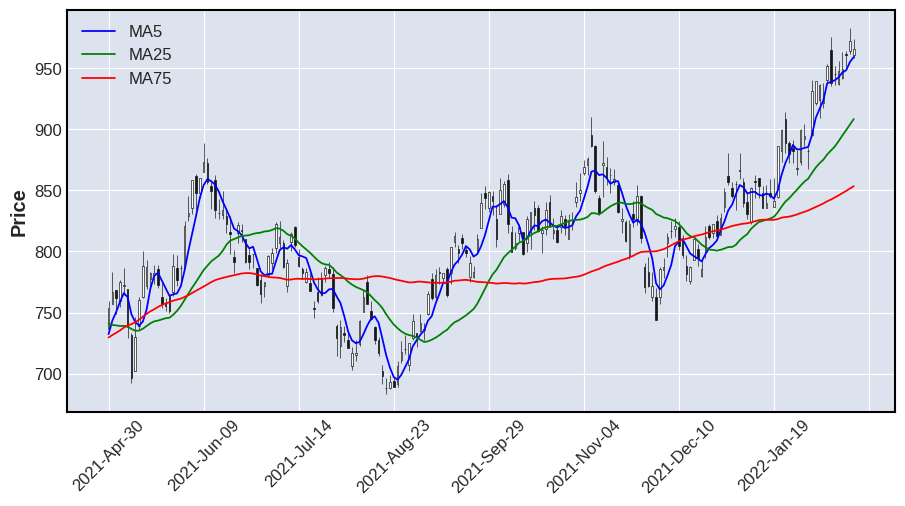

In [4]:
import mplfinance as mpf
import datetime as dt
import talib as ta

df = get_stock_data(3099) # 三越伊勢丹HD
df["ma5"]   = ta.SMA(df["Close"], 5) 
df["ma25"]  = ta.SMA(df["Close"], 25) 
df["ma75"]  = ta.SMA(df["Close"], 75) 

cdf = df[dt.datetime(2021,4,30):dt.datetime(2022,2,20)]
apd  = [ mpf.make_addplot(cdf["ma5"], color="blue"),
          mpf.make_addplot(cdf["ma25"], color="green"),
          mpf.make_addplot(cdf["ma75"], color="red")]
          
fig, axes = mpf.plot(cdf, type="candle", figratio=(2,1), addplot=apd, returnfig=True)
axes[0].legend(["MA5", "MA25", "MA75"])
fig.show()